# Project 2
## Exploratory Data Analysis - Retail

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing data

In [3]:
# The code was removed by Watson Studio for sharing.

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Columns: 13 entries, Ship Mode to Profit
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df['Discount']=100*df['Discount']
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.0,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,45.0,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,20.0,2.5164


In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,15.620272,28.656896
std,32063.693350,623.245101,2.225110,20.645197,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,20.000000,8.666500
75%,90008.000000,209.940000,5.000000,20.000000,29.364000
max,99301.000000,22638.480000,14.000000,80.000000,8399.976000


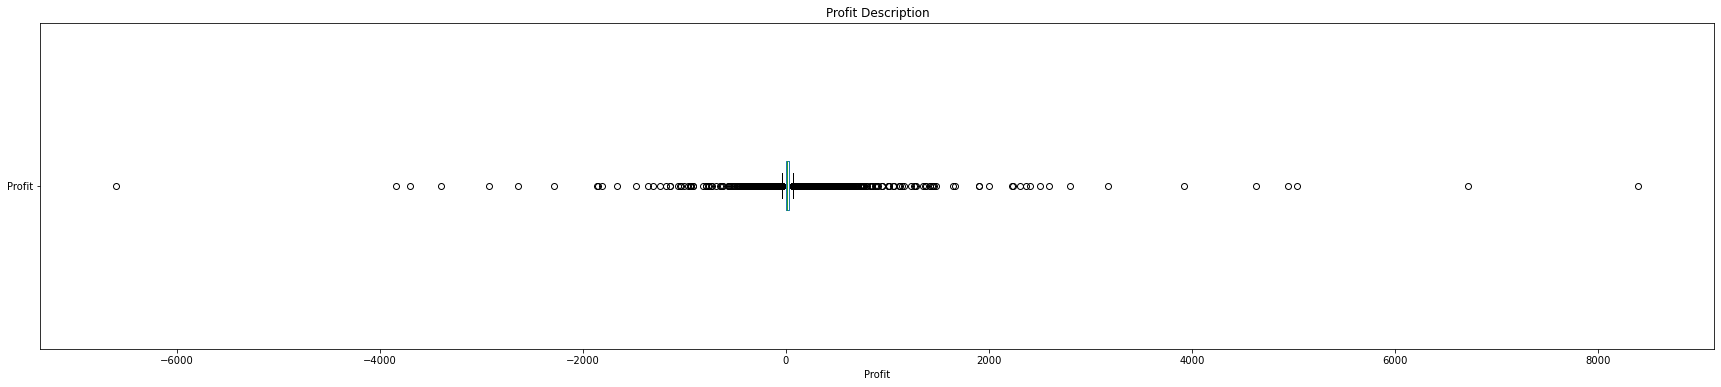

In [7]:
df['Profit'].plot(kind='box',figsize=(30,6),vert=False)
plt.xlabel('Profit')
plt.title('Profit Description')
plt.show()

## Discount vs Profit

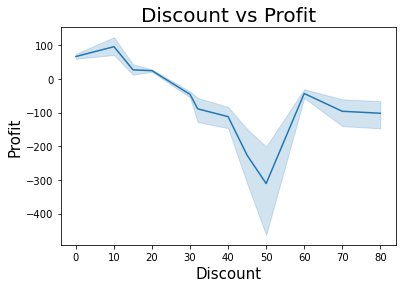

In [8]:
sns.lineplot(x='Discount',y='Profit',data=df)
plt.xlabel('Discount', fontsize=15)
plt.ylabel('Profit',fontsize=15)
plt.title('Discount vs Profit', fontsize=20)
plt.show()

<AxesSubplot:ylabel='Frequency'>

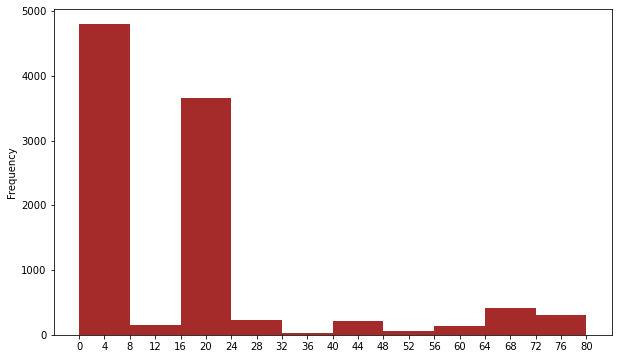

In [43]:
count,bin_edges=np.histogram(df['Discount'],20)
df['Discount'].plot(kind='hist',figsize=(10,6),xticks=bin_edges, color='Brown')

### Observation - Discount vs Profit
* For discount rates between 0 and 10%, profit is maximum.
* Profit decreases when discount increases from 15%.
* The frequency of high discount rates is low which is good.
* Discount rates higher than 15% should be avoided.

## Quantity vs Profit

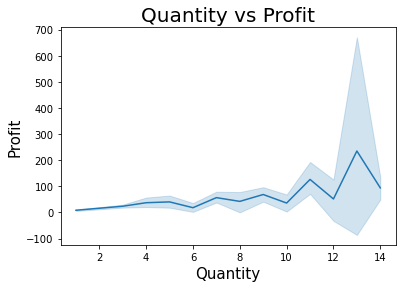

In [10]:
sns.lineplot(x='Quantity',y='Profit',data=df)
plt.xlabel('Quantity', fontsize=15)
plt.ylabel('Profit',fontsize=15)
plt.title('Quantity vs Profit', fontsize=20)
plt.show()

<AxesSubplot:ylabel='Frequency'>

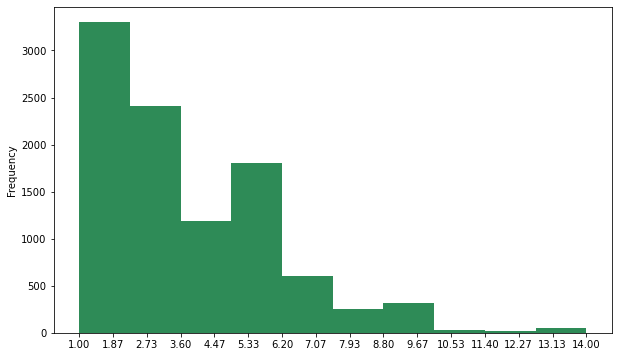

In [51]:
count,bin_edges=np.histogram(df['Quantity'],15)
df['Quantity'].plot(kind='hist',figsize=(10,6),xticks=bin_edges, color='Seagreen')

### Observation
* Profit is high for greater quantity.
* Frequency of bulk orders is less compared to small orders.
* Fixing a minimum order quantity might be a solution.

## Sale vs Profit

Text(0.5, 1.0, 'Sale vs Profit')

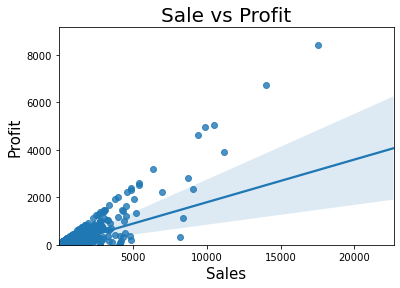

In [12]:
sns.regplot(x='Sales',y='Profit',data=df)
plt.ylim(0,)
plt.xlabel('Sales', fontsize=15)
plt.ylabel('Profit', fontsize=15)
plt.title('Sale vs Profit', fontsize=20)

In [13]:
df[['Sales','Profit']].corr()

,Sales,Profit
Sales,1.000000,0.479064
Profit,0.479064,1.000000


### Observation
* Sale has a moderate correlation with profit, greater than discount or quantity.
* Profit can increase with an increase in sale.

## Segment, Ship Mode vs Profit

In [14]:
df1=df[['Segment','Ship Mode','Profit']]
df_ctg=df1.groupby(['Segment','Ship Mode'],as_index=False).mean()
df_pivot=df_ctg.pivot(index='Segment',columns='Ship Mode')
df_pivot

Profit                                       
Ship Mode   First Class   Same Day Second Class Standard Class
Segment                                                       
Consumer      27.794595  31.148913    24.457756      25.259011
Corporate     29.823654  15.948612    29.927279      31.716781
Home Office   46.237056  37.494747    45.170921      26.791720

<AxesSubplot:xlabel='None-Ship Mode', ylabel='Segment'>

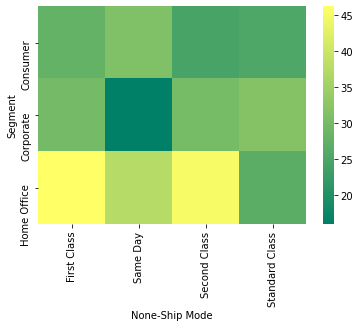

In [15]:
x_labels=['First Class','Same Day','Second Class','Standard Class']
y_labels=['Consumer','Corporate','Home Office']
sns.heatmap( df_pivot,cmap='summer',xticklabels=x_labels, yticklabels=y_labels)


### Observation
* Maximum profit when orders placed for Home Office with First Class or Second Class Shipping Mode.
* Minimum profit when orders placed for Corporates with Same Day Shipping Mode.

## City wise profit

In [55]:
avg=df.groupby('City').agg({'Profit':'mean'})
avg=avg.sort_values('Profit')
avg.reset_index(inplace=True)
avg.tail(5)

,City,Profit
526,Appleton,277.383150
527,Minneapolis,296.721070
528,Lafayette,323.173794
529,Independence,487.831500
530,Jamestown,642.885750


In [56]:
avg.head(5)

,City,Profit
0,Bethlehem,-200.619160
1,Champaign,-182.352000
2,Oswego,-178.709200
3,Round Rock,-169.061614
4,Lancaster,-157.371052


### Observation
* The top 5 cities that account for maximum profit are Jamestown, Independence, Lafayette, Minneapolis and Appleton.
* The bottom 5 cities that account for the least profit are Bethlehem, Champaign, Oswego, Round Rock and Lancaster.

## State-wise Profit

In [57]:
avg1=df.groupby('State').agg({'Profit':'mean'})
avg1=avg1.sort_values('Profit')
avg1.reset_index(inplace=True)
avg1.tail(5)

,State,Profit
44,Minnesota,121.608847
45,Montana,122.221900
46,Indiana,123.375411
47,Rhode Island,130.100523
48,Vermont,204.088936


In [59]:
avg1.head(5)

,State,Profit
0,Ohio,-36.186304
1,Colorado,-35.867351
2,North Carolina,-30.083985
3,Tennessee,-29.189583
4,Pennsylvania,-26.507598


### Observation
* The top 5 states that account for maximum profit are Vermont, Rhode Island, Indiana, Montana and Minnesota.
* The bottom 5 states that account for least profit are Ohio, Colorado, North Carolina, Tennessee and Pennsylvania.

## Category vs Profit

In [20]:
df2=df.groupby('Category').agg({'Quantity':'sum'})
df2=df2.sort_values('Quantity')
df2.reset_index(inplace=True)
df2

,Category,Quantity
0,Technology,6939
1,Furniture,8028
2,Office Supplies,22906


In [24]:
df3=df.groupby('Category').agg({'Profit':'mean'})
df3.reset_index(inplace=True)
df3

,Category,Profit
0,Furniture,8.699327
1,Office Supplies,20.327050
2,Technology,78.752002


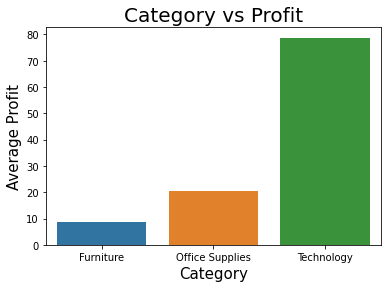

In [26]:
sns.barplot(data=df3,x='Category',y='Profit')
plt.xlabel('Category', fontsize=15)
plt.ylabel('Average Profit', fontsize=15)
plt.title('Category vs Profit', fontsize=20)
plt.show()

### Observation
* For smaller quantity of technology related stuff sold, profit is high.
* For greater quantity of Office Supplies and Furniture sold, the profit is much less.

## Sub-Category vs Profit

In [22]:
df1=df.groupby('Sub-Category').agg({'Quantity':'sum'})
df1=df1.sort_values('Quantity')
df1.reset_index(inplace=True)
df1

,Sub-Category,Quantity
0,Copiers,234
1,Machines,440
2,Supplies,647
3,Bookcases,868
4,Envelopes,906
5,Fasteners,914
6,Tables,1241
7,Labels,1400
8,Appliances,1729
9,Chairs,2356


In [60]:
df4=df.groupby('Sub-Category').agg({'Profit':'mean'})
df4.reset_index(inplace=True)
df4=df4.sort_values('Profit')
df4

,Sub-Category,Profit
16,Tables,-55.565771
4,Bookcases,-15.230509
15,Supplies,-6.258418
8,Fasteners,4.375660
2,Art,8.200737
9,Furnishings,13.645918
10,Labels,15.236962
3,Binders,19.843574
12,Paper,24.856620
14,Storage,25.152277


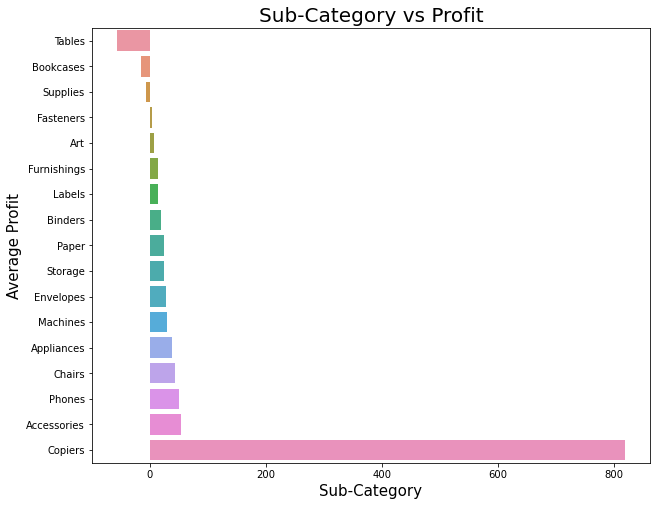

In [61]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df4,y='Sub-Category',x='Profit',ax=ax)
plt.xlabel('Sub-Category', fontsize=15)
plt.ylabel('Average Profit', fontsize=15)
plt.title('Sub-Category vs Profit', fontsize=20)
plt.show()

### Observation
* For a greater number of binders sold, the profit is very small.
* For a smaller number of copiers sold, the profit is very high.